$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

# Quantum simulation of Unruh Tempreature.

### Introduction
#### Step 1:
First we need to determine the coupling frequancy ``` g_ch ```  as a function of an characteristic acceleration  $A_{ch} $ , fixing $g_{ch}$ and varing the number of maximum excited atomes $N_{e}$ (phononic excitation) going to give rise to the driven simulated acceleration. 

We have found that:  $g_{ch}=\frac{\sigma A_{ch} }{2c}$.
Where: 
$\sigma = \ln\coth(\frac{\pi}{4}\Delta n)$
and:
$\Delta n = \frac{e^{\frac{\pi}{2}}}{e^{\pi}-1}$
#### Step 2:
Now since we have ```g_ch``` we can generate the hamiltonian that characterise  the simulator for various number of possible maximum possible (phononic excitations) excited atomes.
#### Step 3:
Next we estimate  the eigenspectrum of this hamiltonian numerically  through  ```qutip```.
#### Step 4:
Then we compute the heat capacity with the help of the tools of the density operator formalism and statistical mechanics, and we can also estimate the expectation value of the number operator using ```qutip.mesolve ``` module.
#### Step 5 :
Finally we check the hypothesise stated in the paper and simulating the Unruh tempreature through the connection between the critical tempreature and the averger number of the phononic excitation  of these Bose-Eienstein thermal baths $T_{c}\propto \bar{n}_{c}$, where $\bar{n}_{c}\equiv\bar{n}\,(T_{c}) $ ,this will be through comparnig with Hu $\textit{et al}$ data and the simulated tempreature formula in Hu $\textit{et al}$. 


First of all in order to excute this notebook, you need to install qutip through the follwing commend ``` pip install qutip ``` and import the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, thermal_dm
from qutip import expect, tensor, sigmax, sigmay, sigmaz, qeye, sesolve, mesolve, fock, destroy, create, Bloch

In [2]:
# constants
# this constants are chracherising each snapchot 
sd_nexatome=np.sqrt(np.exp(np.pi)/((np.exp(np.pi)-1)**2))  # the standerd deviation of the number of exted atome  from the BEC.
h_bar=1.054e-34 # reduced planck constant 
a=1.07e14 # charachterstic accelration A_ch
sigma=0.42*sd_nexatome    # ln(coth(pi/4)
c=3e8           # speed of light  
# the coupling frequancy
g=(sigma*a)/(2*c)
eta=(g*h_bar)

In [3]:
print(eta)

1.715218303907626e-30


### Matrix Hamiltonian Generator.

In [4]:
# hamiltonian generator 
def hamiltonian_ugen(N_atoms) -> 'np.array':
    H=np.zeros((N_atoms+1,N_atoms+1 ),dtype=complex)
    for i in range(N_atoms+1):
        for j in range(N_atoms+1):
            if j == i+1:
                H[i,j] += -1j*j
            if i == j+1:
                H[i,j] += 1j*i 
    return H 

Using the hamiltonian generator to generate various hamiltonian and define  them as an ```Qobj``` (quantum object).

In [5]:
hamiltonian3atoms = Qobj(hamiltonian_ugen(3))
hamiltonian4atoms = Qobj(hamiltonian_ugen(4))
hamiltonian5atoms = Qobj(hamiltonian_ugen(5))
hamiltonian6atoms = Qobj(hamiltonian_ugen(6))
hamiltonian7atoms = Qobj(hamiltonian_ugen(7))
hamiltonian8atoms = Qobj(hamiltonian_ugen(8))
hamiltonian9atoms = Qobj(hamiltonian_ugen(9))
hamiltonian10atoms= Qobj(hamiltonian_ugen(10))
hamiltonian17atoms= Qobj(hamiltonian_ugen(17))
hamiltonian20atoms= Qobj(hamiltonian_ugen(20))
hamiltonian27atoms= Qobj(hamiltonian_ugen(27))
hamiltonian30atoms= Qobj(hamiltonian_ugen(30))
hamiltonian37atoms= Qobj(hamiltonian_ugen(37))
hamiltonian40atoms= Qobj(hamiltonian_ugen(40))
hamiltonian50atoms= Qobj(hamiltonian_ugen(50))
hamiltonian60atoms= Qobj(hamiltonian_ugen(60))

In [6]:
eigenspectrum3atoms = eta*hamiltonian3atoms.eigenenergies()
eigenspectrum4atoms = eta*hamiltonian4atoms.eigenenergies()
eigenspectrum5atoms = eta*hamiltonian5atoms.eigenenergies()
eigenspectrum6atoms = eta*hamiltonian6atoms.eigenenergies()
eigenspectrum7atoms = eta*hamiltonian7atoms.eigenenergies()
eigenspectrum8atoms = eta*hamiltonian8atoms.eigenenergies()
eigenspectrum9atoms = eta*hamiltonian9atoms.eigenenergies()
eigenspectrum10atoms= eta*hamiltonian10atoms.eigenenergies()
eigenspectrum17atoms= eta*hamiltonian17atoms.eigenenergies()
eigenspectrum20atoms= eta*hamiltonian20atoms.eigenenergies()
eigenspectrum27atoms= eta*hamiltonian27atoms.eigenenergies()
eigenspectrum30atoms= eta*hamiltonian30atoms.eigenenergies()
eigenspectrum37atoms= eta*hamiltonian37atoms.eigenenergies()
eigenspectrum40atoms= eta*hamiltonian40atoms.eigenenergies()
eigenspectrum50atoms= eta*hamiltonian50atoms.eigenenergies()
eigenspectrum60atoms= eta*hamiltonian60atoms.eigenenergies()

### Defining the Partion Function and the Internal energie 

In [7]:
k_b=1.38e-23
def partition_z(temp: float, exp_vals: "np.array"):
   return np.sum(np.exp(-exp_vals/(k_b*temp)))

In [8]:
def internal_energy(temp: float, exp_vals: "np.array"):
  return (1/eta)*np.sum(np.exp(-exp_vals/(k_b*temp)) * exp_vals) / partition_z(temp, exp_vals)

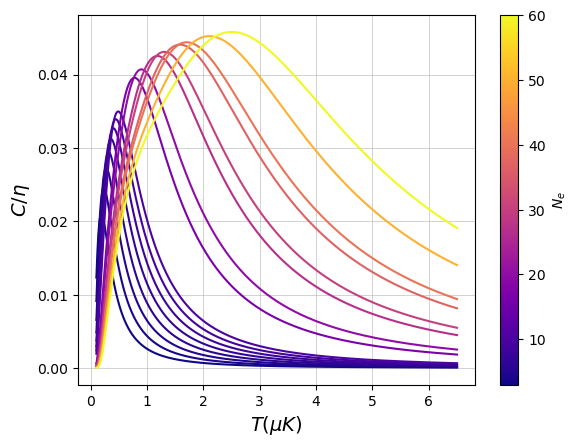

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as colors

cmap = cm.plasma
norm = colors.Normalize(vmin=3, vmax=60)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
fig, ax = plt.subplots()
constant=4.06e-21
tu_a =constant*a
x = np.linspace(1e-7,6.5e-6 , 2000)
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum3atoms)).real  for temp in x]),label="$N_{e}$=3", color=cmap(norm(3)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum4atoms)).real  for temp in x]),label="$N_{e}$=4", color=cmap(norm(4)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum5atoms)).real  for temp in x]),label="$N_{e}$=5", color=cmap(norm(5)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum6atoms)).real  for temp in x]),label="$N_{e}$=6", color=cmap(norm(6)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum7atoms)).real  for temp in x]),label="$N_{e}$=7", color=cmap(norm(7)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum8atoms)).real  for temp in x]),label="$N_{e}$=8", color=cmap(norm(8)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum9atoms)).real  for temp in x]),label="$N_{e}$=9", color=cmap(norm(9)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum10atoms)).real  for temp in x]),label="$N_{e}$=10", color=cmap(norm(10)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum17atoms)).real  for temp in x]),label="$N_{e}$=17", color=cmap(norm(17)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum20atoms)).real  for temp in x]),label="$N_{e}$=20", color=cmap(norm(20)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum27atoms)).real  for temp in x]),label="$N_{e}$=27", color=cmap(norm(27)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum30atoms)).real  for temp in x]),label="$N_{e}$=30", color=cmap(norm(30)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum37atoms)).real  for temp in x]),label="$N_{e}$=37", color=cmap(norm(37)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum40atoms)).real  for temp in x]),label="$N_{e}$=40", color=cmap(norm(40)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum50atoms)).real  for temp in x]),label="$N_{e}$=50", color=cmap(norm(50)))
ax.plot(x/1e-6,np.gradient([internal_energy(temp, np.array(eigenspectrum60atoms)).real  for temp in x]),label="$N_{e}$=60", color=cmap(norm(60)))
ax.set_xlabel(r"$T(\mu K)$", fontsize=14)
ax.set_ylabel(r"$C/\eta$", fontsize=14)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$N_{e}$")
plt.grid(linewidth = 0.4)
plt.savefig('newCfig2.png', dpi=1000)
plt.show()

### The Following is a function thats extract the critical tempreature (Simulated Unruh Tempreature)

In [10]:
def simulated_unruh_temp(exp_vals: "np.array"):
    y=np.gradient([internal_energy(temp, exp_vals).real  for temp in x])
    max_ind=np.argmax(y)
    ymax = y[max_ind]
    xmax = x[max_ind]
    T_sim = xmax
    return T_sim

In [11]:
list_exp = [eigenspectrum3atoms,eigenspectrum4atoms,eigenspectrum5atoms,eigenspectrum6atoms,eigenspectrum7atoms,eigenspectrum8atoms,eigenspectrum9atoms,eigenspectrum10atoms,eigenspectrum17atoms,eigenspectrum20atoms,eigenspectrum27atoms,eigenspectrum30atoms,eigenspectrum37atoms,eigenspectrum40atoms,eigenspectrum50atoms,eigenspectrum60atoms]
list_temp = []
for i in range(16):
    unruh_tempreaturs= simulated_unruh_temp(list_exp[i])
    list_temp.append(unruh_tempreaturs)
print(list_temp)

[np.float64(1.896448224112056e-07), np.float64(2.312656328164082e-07), np.float64(2.7608804402201103e-07), np.float64(3.177088544272136e-07), np.float64(3.625312656328164e-07), np.float64(4.04152076038019e-07), np.float64(4.4577288644322157e-07), np.float64(4.873936968484242e-07), np.float64(7.787393696848424e-07), np.float64(9.0040020010005e-07), np.float64(1.1821410705352674e-06), np.float64(1.303801900950475e-06), np.float64(1.5855427713856928e-06), np.float64(1.7040020010005002e-06), np.float64(2.104202101050525e-06), np.float64(2.50120060030015e-06)]


### Number operatore 

In [12]:
def number_op(N):
    return create(N)*destroy(N)

In [13]:
def num_op_eigenvalues(N:'int'):
    eigenvalues_n = np.zeros((N), dtype=float)
    for i in range(N):
        eigenvalues_n[i] += expect(number_op(N),Qobj(hamiltonian_ugen(N-1)).eigenstates()[1][i])
 
    return eigenvalues_n

### Averge number of phononic Exication 

#### This will be computed for each snapshote

In [14]:
def avrege_N(temp: float, exp_vals: "np.array", exp_vals_1: "np.array"):
    return np.sum(np.exp(-exp_vals/(k_b*temp))*exp_vals_1) / partition_z(temp, exp_vals)

In [15]:
expextvalue_3atom=num_op_eigenvalues(4)
expextvalue_4atom=num_op_eigenvalues(5)
expextvalue_5atom=num_op_eigenvalues(6)
expextvalue_6atom=num_op_eigenvalues(7)
expextvalue_7atom=num_op_eigenvalues(8)
expextvalue_8atom=num_op_eigenvalues(9)
expextvalue_9atom=num_op_eigenvalues(10)
expextvalue_10atom=num_op_eigenvalues(11)
expextvalue_17atom=num_op_eigenvalues(18)
expextvalue_20atom=num_op_eigenvalues(21)
expextvalue_27atom=num_op_eigenvalues(28)
expextvalue_30atom=num_op_eigenvalues(31)
expextvalue_37atom=num_op_eigenvalues(38)
expextvalue_40atom=num_op_eigenvalues(41)
expextvalue_50atom=num_op_eigenvalues(51)
expextvalue_60atom=num_op_eigenvalues(61)

### The following is a list for the $\bar{n}_{c}$

In [16]:
list_expn=[expextvalue_3atom,expextvalue_4atom,expextvalue_5atom,expextvalue_6atom,expextvalue_7atom,expextvalue_8atom,expextvalue_9atom,expextvalue_10atom,expextvalue_17atom,expextvalue_20atom,expextvalue_27atom,expextvalue_30atom,expextvalue_37atom,expextvalue_40atom,expextvalue_50atom,expextvalue_60atom]
list_nbar=[]
for i in range(16):
    unruh_tempreaturs= simulated_unruh_temp(list_exp[i])
    list_nbar.append(avrege_N(unruh_tempreaturs,list_exp[i],list_expn[i]))
print(list_nbar)

[np.float64(1.914433461362679), np.float64(2.6694408191773475), np.float64(3.428951008744601), np.float64(4.205342913991641), np.float64(4.977188345548747), np.float64(5.76343859686916), np.float64(6.55299683832317), np.float64(7.345074864358494), np.float64(12.927905073349901), np.float64(15.345259128446607), np.float64(21.00838357844795), np.float64(23.43466860495817), np.float64(29.11060009458113), np.float64(31.555587521668834), np.float64(39.68409142681522), np.float64(47.83250957170282)]


### Simulated Acceleration and Tempreature

In [17]:
def nbar_to_acceleration(nbar):
    omega = 2 * np.pi * 2.1 * 1000
    Ekf = (h_bar * omega / 2)
    return 2 * np.pi * c * Ekf / h_bar / np.log(1 + 1 / nbar)

In [18]:
def temp_unruh(acceleration):
    return (h_bar / 2 / np.pi / c / k_b) * acceleration # in microKelvin

In [19]:
def temp_unruh_nbar(nbar):
    acceleration = nbar_to_acceleration(nbar)
    return temp_unruh(acceleration)

### Theoritical simulated slope 

In [20]:
omega = 2 * np.pi * 2.1 * 1000
Ekf = (h_bar * omega / 2)
theoretical_slope = (h_bar / 2 / np.pi / c / k_b) * 2 * np.pi * c * Ekf / h_bar 
print('Theoretical slope (when nbar >> 1) is (Kelvin/nbar):', theoretical_slope)

Theoretical slope (when nbar >> 1) is (Kelvin/nbar): 5.038841434388149e-08


### Comparing Data ,Our Model Vs The Experiment Vs Theoritical Simulated Acceleration 

#### Our model simulate the Experiment in Hu $\textit{Hu et al}$ paper

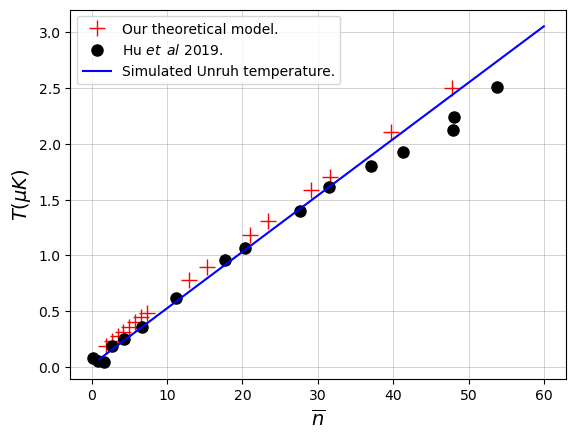

In [21]:
x = np.linspace(1, 60)  # linspace of the effective n_bar
#Experiment data extracted using Enguage Degtizer 
n_exp = np.load("exp_data/n_exp.npy") #n_exp is effective mean population
t_exp = np.load("exp_data/t_exp.npy") #t_exp is the temperature in microKelvin
# Our Model dataSS
n_c = np.array(list_nbar)
t_c =np.array(list_temp)
plt.plot(n_c, t_c*1e6,color='r',marker = '+', linestyle='None', markersize = 12.0, label="Our theoretical model.")
plt.plot(n_exp,t_exp*1e6 ,color='k', marker = 'o', linestyle='None', markersize = 8.0, label=r"Hu $\it{et}\,\,\,\it{al}$ 2019.")
plt.plot(x, temp_unruh_nbar(x)*1e6,color='b', markersize = 12.0, label='Simulated Unruh temperature.')
plt.xlabel(r"$\overline{n}$",fontsize=14)
plt.ylabel(r"$T(\mu K)$",fontsize=14)
plt.grid(linewidth = 0.4)
plt.legend()
plt.savefig("new_main_graph2.png", dpi=1000)
plt.show()

### Deducing slops and Comparing with the theoritical simulated slope 

In [22]:
from sklearn.linear_model import LinearRegression
def get_slope(x, y):
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    return lr.coef_

## Comparing The Ratio   $\kappa$

In [23]:
slope_model = get_slope(n_c,t_c)    #slope of our theoritical model whic simulate the experiment conducted by Hu et al.
print("Model = ",slope_model)

Model =  [5.03608321e-08]


In [24]:
kappa_unruh = (h_bar / 2 / np.pi  / k_b) 
kappa_model  = (slope_model/(Ekf/(k_b)))*kappa_unruh
print("kappa for Unruh = " ,kappa_unruh)
print("kappa of the Model = ",kappa_model)S

kappa for Unruh =  1.2155747102815773e-12
kappa of the Model =  [1.21490931e-12]


## License
Copyright © 2022, [Constantine Quantum Technologies](https://cqtech.org). Released under the [Apache License 2.0](LICENSE).